# Flight Take Off Data - JFK Airport
Predicting Taxi Out delay and more

Import the necessary libraries

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

Retrieving the data and some useful info

In [61]:
data = pd.read_csv('M1_final.csv')
pd.options.display.max_columns = 30
pd.options.display.max_rows = 30
data.head(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13
5,11,1,5,AA,N983NN,ORD,-1,161,740,359,358,460,46,32,58,W,24,35,29.91,Fair / Windy,9,17,21
6,11,1,5,AA,N107NN,LAX,-1,373,2475,360,359,553,46,32,58,W,24,35,29.91,Fair / Windy,9,17,26
7,11,1,5,B6,N274JB,BUF,-5,80,301,365,360,445,46,32,58,W,24,35,29.91,Fair / Windy,17,21,11
8,11,1,5,B6,N663JB,LGB,0,368,2465,365,365,553,46,32,58,W,24,35,29.91,Fair / Windy,17,21,25
9,11,1,5,B6,N283JB,FLL,3,184,1069,370,373,554,46,32,58,W,24,35,29.91,Fair / Windy,17,21,29


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [19]:
## here we can get some informartion that we may be able to use later on for subtle comparisons through the statistical summary
data.iloc[:, 3:].describe()

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


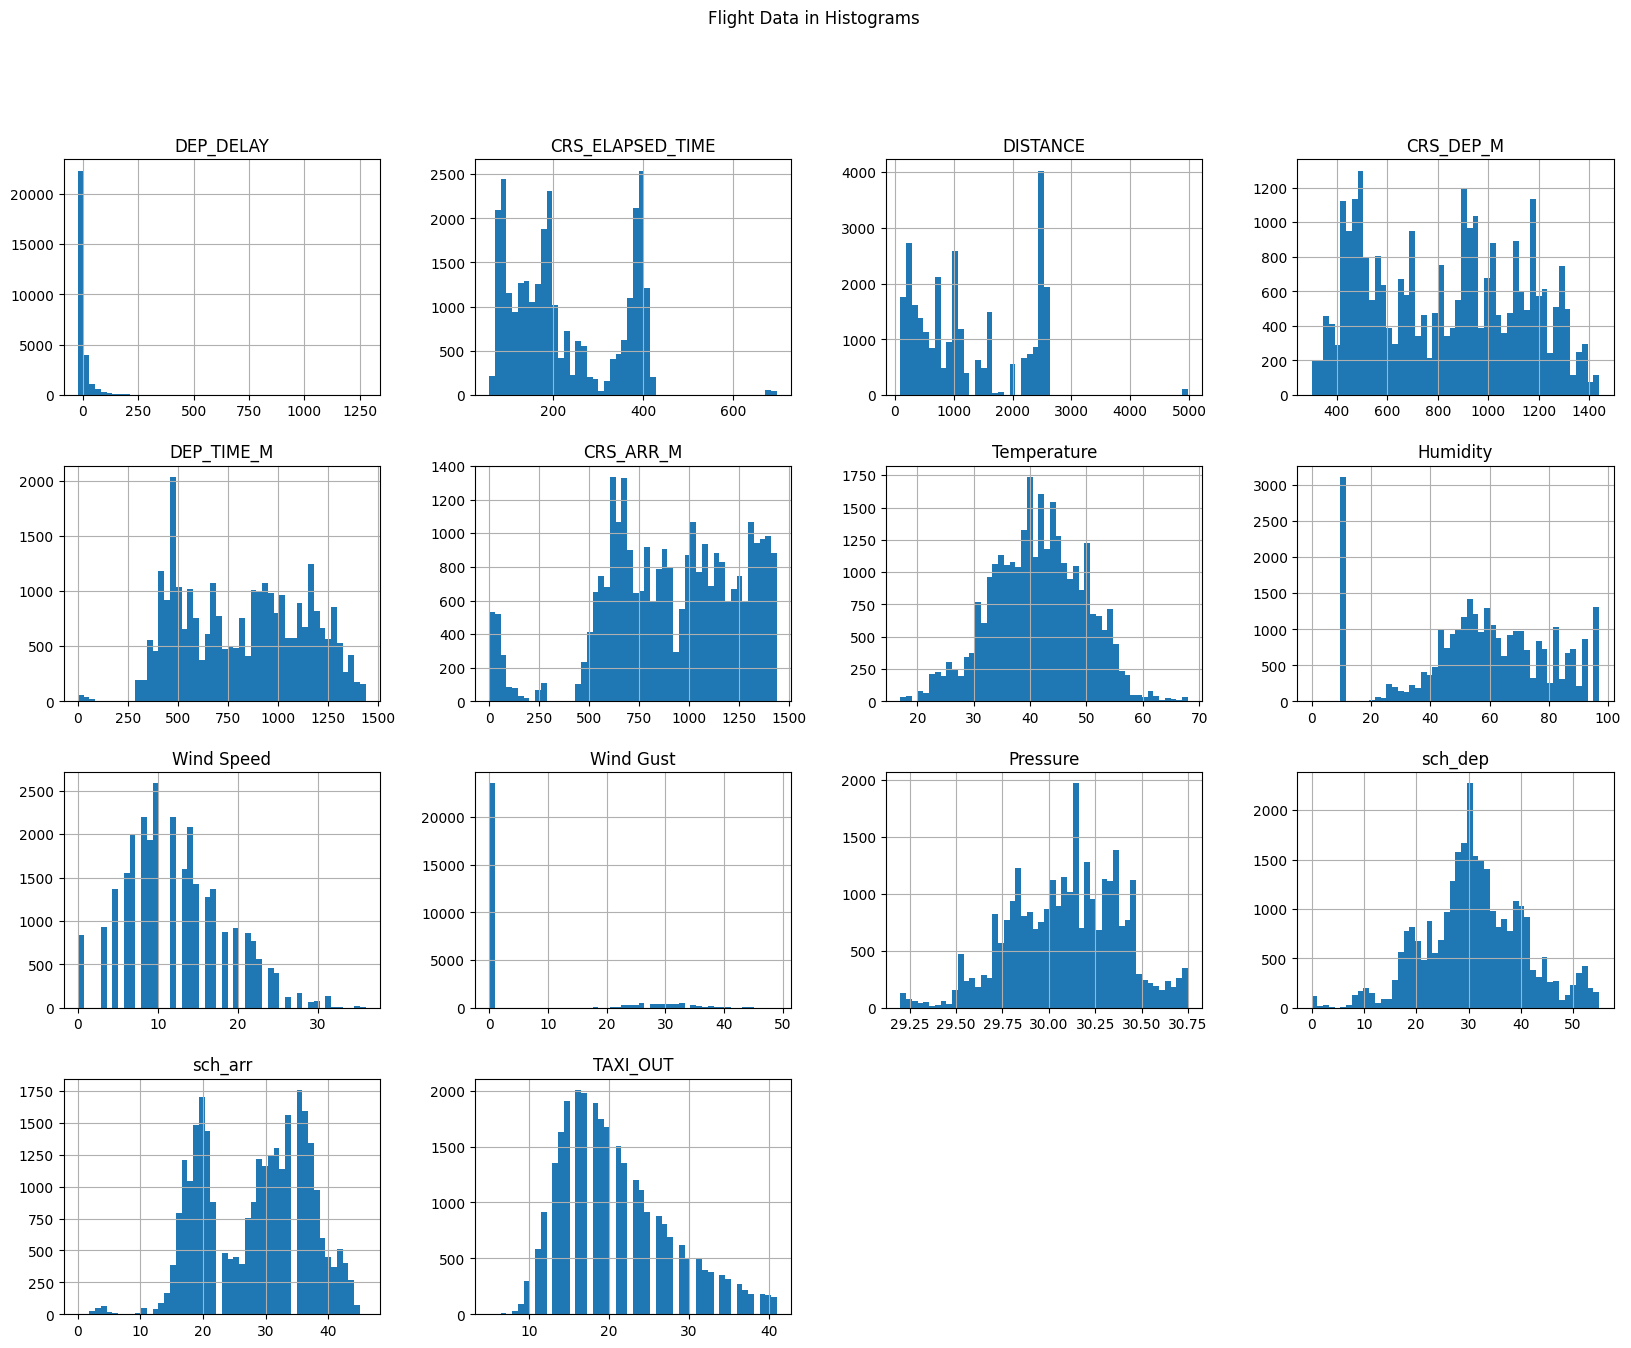

In [24]:
## showing this information in histograms
data.iloc[:, 3:].hist(bins=50, figsize=(20,15))
plt.suptitle('Flight Data in Histograms')
plt.show()

In [14]:
## correlations between dates don't mean anything useful so they are better removed
corr_mat = data.iloc[:, 3:].corr(numeric_only=True)
corr_mat

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
DEP_DELAY,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574
Humidity,-0.011776,0.017198,0.015110,0.003843,-0.005923,-0.033163,0.054401,1.000000,-0.110274,-0.106828,0.033677,0.035358,-0.027042,-0.026826
Wind Speed,0.067718,-0.013440,-0.010734,0.008063,0.006033,0.014180,0.010603,-0.110274,1.000000,0.698795,-0.309978,-0.024948,-0.013499,0.062522
Wind Gust,0.044340,-0.011934,-0.009522,-0.009887,-0.014336,0.004486,-0.039487,-0.106828,0.698795,1.000000,-0.186249,-0.023190,-0.016584,0.095643


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

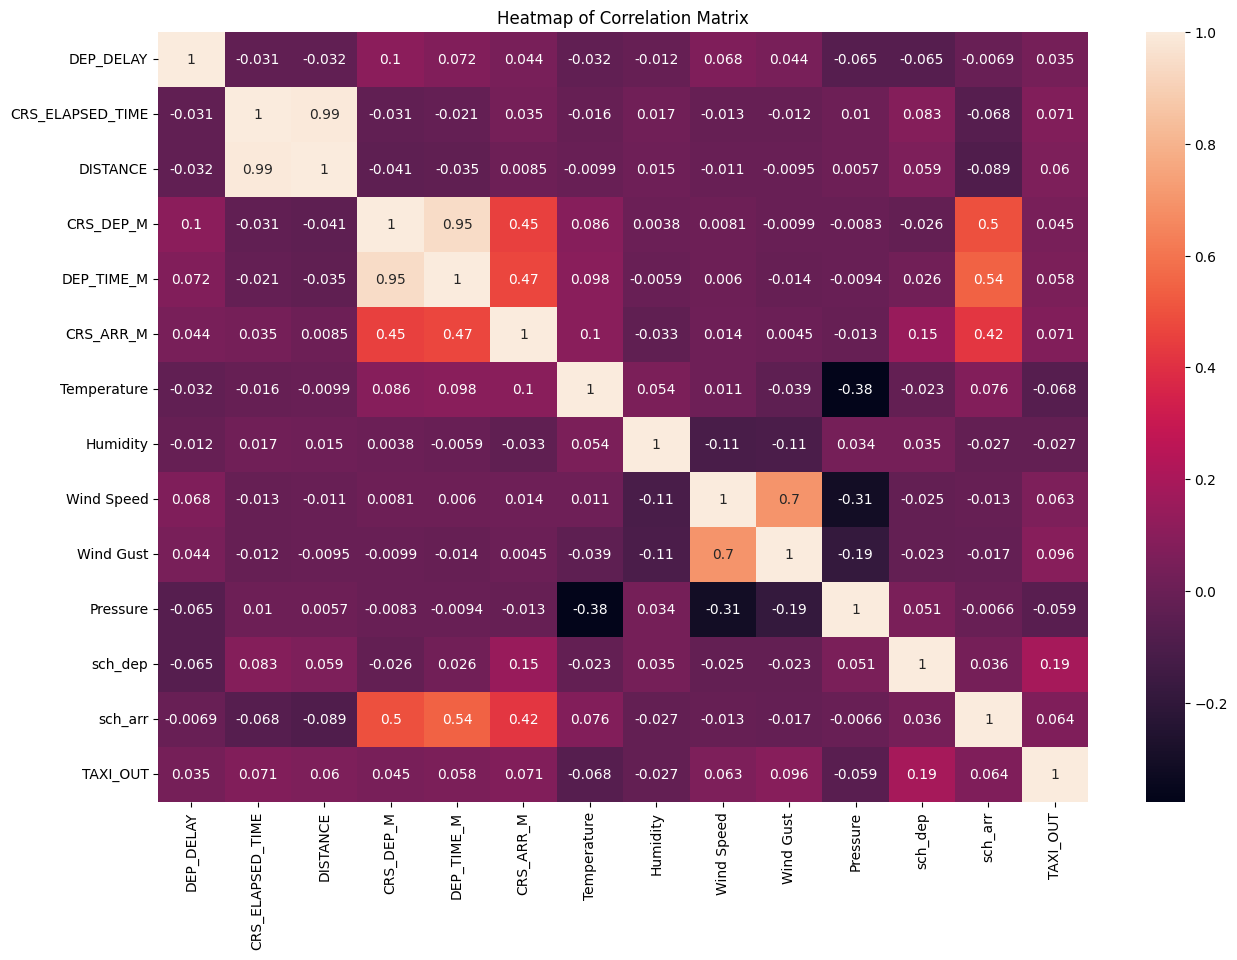

In [22]:
## pretty visualisations never hurt anyone
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot=True)
plt.title('Heatmap of Correlation Matrix')
## from here we can see that there are barely any correlations in between individual variables

We can see from the matrix that we should have no issues creating a model that could almost perfectly predict the elapsed time using the distance as its input due to the very high correlation. Let's put that to the test.

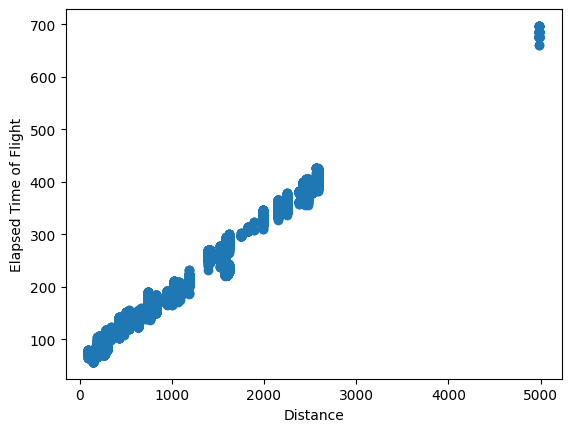

In [64]:
## scatter plot to see relationship
plt.scatter(data['DISTANCE'], data['CRS_ELAPSED_TIME'])
## label the axes
plt.xlabel('Distance')
plt.ylabel('Elapsed Time of Flight')
plt.show()

In [53]:
x = data['DISTANCE'].values.reshape(-1,1)
y = data['CRS_ELAPSED_TIME'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

,Actual,Predicted
0,391,379.524953
1,239,269.431222
2,395,379.524953
3,395,386.606225
4,175,182.051003
...,...,...
5759,169,166.552371
5760,184,195.011066
5761,142,134.619844
5762,71,68.483440


In [54]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))

MAE:  9.14806294974876
MSE:  156.77291884979178
RMSE:  12.520899282790824
R2:  0.9890492315302343


The R2 value of 0.99 shows the accuray of the model. Of course it is not perfect, but it would be quite reliable for predictions as to how long a flight should take given the distance. The graph above also shows a very strong correlation.

Now let's see if we can predict the Taxi Out time under certain weather conditions

In [30]:
## how do weather conditions affect the taxi out time
x = data[['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure']] ## numeric only values in the datatset
y = data['TAXI_OUT']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = lin_reg.predict(x_test)

In [36]:
## create a dataframe for prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
9362,23,20.746308
23840,14,23.065183
24617,22,21.867914
24899,19,23.521359
2007,20,19.261763
...,...,...
25685,18,20.354751
376,16,19.231538
10922,34,22.490853
7106,17,20.786914


In [37]:
## model evaluation
## Mean absolute error - should be low
## Mean square error - should be low
## Root mean square error - should be low
## Rsquared - as close to 1 as possible

print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))

MAE:  5.481255944297056
MSE:  46.43477191670924
RMSE:  6.814306414941233
R2:  0.031187239224834906


### Model Evaluation
The R2 value would be a lot closer to 1 if the model was more accurate. 
There are many reasons why the model could have failed, for example the data values being too far apart or the dataset itself being quite rough.
I will try again with more standard values, closer together to see if there is a difference.

In [42]:
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.transform(x_test)

In [43]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_train2, y_train)

LinearRegression()

In [44]:
y_pred2 = lin_reg2.predict(x_test2)

In [45]:
## create a dataframe for prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})

,Actual,Predicted
9362,23,20.746308
23840,14,23.065183
24617,22,21.867914
24899,19,23.521359
2007,20,19.261763
...,...,...
25685,18,20.354751
376,16,19.231538
10922,34,22.490853
7106,17,20.786914


In [46]:
## Mean absolute error - should be low
## Mean square error - should be low
## Root mean square error - should be low
## Rsquared - as close to 1 as possible

print('MAE: ', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('R2: ', metrics.r2_score(y_test, y_pred2))

MAE:  5.481255944297056
MSE:  46.43477191670925
RMSE:  6.814306414941234
R2:  0.031187239224834684


### 2nd Model Evaluation
As we can see the performance measures haven't changed, showing that the input values themselves weren't the issue. It is could be any reason including the dataset itself not being conclusive enough. Perhaps due to a small sample size, or maybe when the data was collected. It could also be that the input variables simply don't make enough of an impact on the taxi out time, and therefore it can't be predicted by them. <br> We can try to implement Lasso/Ridge models in hopes that any irrelevant data is altered to make a more accuirate representation.

In [65]:
x = data[['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure']] ## numeric only values in the datatset
y = data['TAXI_OUT']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [67]:
## building the models
model_lasso = Lasso(alpha=0.99)
model_ridge = Ridge(alpha=0.99)

## fitting the models
model_lasso.fit(x_train, y_train)
model_ridge.fit(x_train, y_train)

Ridge(alpha=0.99)

In [71]:
las_pred = model_lasso.predict(x_test)
print(pd.DataFrame({'Actual': y_test, 'Predicted': las_pred}))

print('MAE: ', metrics.mean_absolute_error(y_test, las_pred))
print('MSE: ', metrics.mean_squared_error(y_test, las_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, las_pred)))
print('R2: ', metrics.r2_score(y_test, las_pred))

       Actual  Predicted
9362       23  20.692027
23840      14  22.712048
24617      22  21.757219
24899      19  22.969530
2007       20  19.703062
...       ...        ...
25685      18  20.574783
376        16  19.822429
10922      34  22.210938
7106       17  20.468372
2829       19  20.286223

[5764 rows x 2 columns]
MAE:  5.486807904720021
MSE:  46.59739391611498
RMSE:  6.8262283814794085
R2:  0.02779430195597843


In [72]:
rid_pred = model_ridge.predict(x_test)
print(pd.DataFrame({'Actual': y_test, 'Predicted': rid_pred}))

print('MAE: ', metrics.mean_absolute_error(y_test, rid_pred))
print('MSE: ', metrics.mean_squared_error(y_test, rid_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, rid_pred)))
print('R2: ', metrics.r2_score(y_test, rid_pred))

       Actual  Predicted
9362       23  20.746308
23840      14  23.065251
24617      22  21.867836
24899      19  23.521378
2007       20  19.261808
...       ...        ...
25685      18  20.354790
376        16  19.231537
10922      34  22.490847
7106       17  20.786898
2829       19  20.106247

[5764 rows x 2 columns]
MAE:  5.481255293047555
MSE:  46.43478179261973
RMSE:  6.814307139586513
R2:  0.031187033174331913


With neither the lasso nor ridge models doing much to imporve the scores of the performance measures, it is fair to conclude that at the very least, the input variables aren't the best for predicting the taxi out accurately. It seems as though we are beating at a dead horse now, so let's see what else we can try to predict.

In [58]:
data.iloc[:, 5:].head(10) ## just to remind myself of the columns

,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13
5,ORD,-1,161,740,359,358,460,46,32,58,W,24,35,29.91,Fair / Windy,9,17,21
6,LAX,-1,373,2475,360,359,553,46,32,58,W,24,35,29.91,Fair / Windy,9,17,26
7,BUF,-5,80,301,365,360,445,46,32,58,W,24,35,29.91,Fair / Windy,17,21,11
8,LGB,0,368,2465,365,365,553,46,32,58,W,24,35,29.91,Fair / Windy,17,21,25
9,FLL,3,184,1069,370,373,554,46,32,58,W,24,35,29.91,Fair / Windy,17,21,29


### Can we predict the taxi out delay based on weather conditions if we also include the dates of these flights?

In [62]:
x = data[['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK']] ## numeric only values in the datatset
y = data['TAXI_OUT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
9362,23,20.693183
23840,14,22.638716
24617,22,21.816642
24899,19,22.921696
2007,20,19.479250
...,...,...
25685,18,19.893647
376,16,19.828613
10922,34,22.812873
7106,17,20.854946


In [63]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))

MAE:  5.465221783291287
MSE:  46.20203745991839
RMSE:  6.797208063603643
R2:  0.036042999300829104


### Model Evaluation
It is almost just as inaccurate, which goes to show that the Taxi Out time just isn't something that can really be predicted. There are probably countless factors that affect it, so to ever get an accurate prediction would be quite difficult.

However there are other things we can try to predict using the dataset and what we have.